# 셀로우 포커스 만들기
## 사진 준비

In [1]:
# 필요한 라이브러리 import 하기

import os
import urllib
import cv2 
import numpy as np
from pixellib.semantic import semantic_segmentation
import matplotlib.pyplot as plt

`urllib` 웹에서 데이터 다운로드 할 때 사용
`cv2` opencv로 이미지 처리
`pixellib` 시맨틱 세그멘테이션 사용 라이브러리

(2208, 2944, 3)


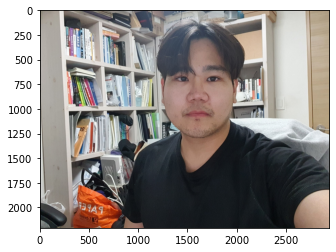

In [2]:
img_path = os.getenv("HOME")+"/aiffel/human_segmentation/images/my_image.jpg"
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 세그멘테이션으로 사람 분리하기

#### 세그멘테이션(Segmentation)이란
이미지에서 픽셀 단위로 관심 객체를 추출하는 방법을 **이미지 세그멘테이션(image segmentation)**이라고 한다.

**시맨틱 세그멘테이션(sementic segmentation)** 물리적 의미 단위로 인식하는 세그멘테이션 사람, 자동차, 비행기 등 물리적인 단위로 분류하는 방법

시멘틱세그멘테이션은 사람이라는 추상적인 정보를 이미지에서 추출해 내는 방법, 사람이 누구던지 같은 라벨로 표현하지만 **인스턴스 세그멘테이션(Instance segmentation)**은 사람 개개인별로 다른 라벨을 가지게 한다. 여러사람이 한 이미지에 등장할 때 객체를 분할해서 인식하는 것이 목표이다.





In [3]:
# 저장할 파일 이름 지정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# pixellib 제공하는 모델 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f2c6b19b340>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

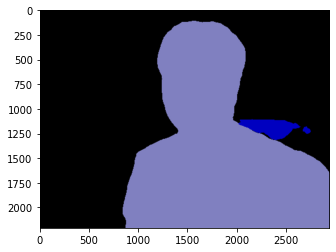

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype = int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind>>channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

In [12]:
seg_color = (128, 128, 192)

(2208, 2944)


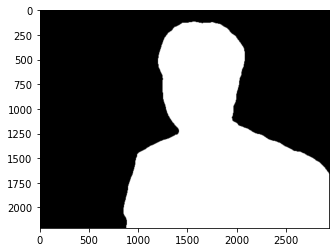

In [13]:
seg_map = np.all(output == seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

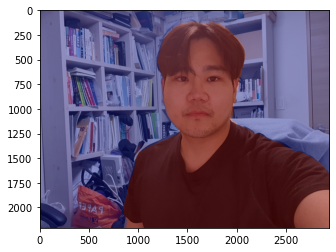

In [14]:
img_show = img_orig.copy()

# True, False 값을 각각 255, 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255

# 255, 0을 적당한 색상으로 바꿔본다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 만들기

`blur()`함수 사용

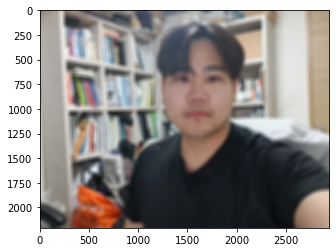

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (50,50))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

예제에 주어진 `cv2.blur(img_orig, (13,13))`을 하니 전혀 블러처리가 되지 않아서 값을 늘려보니 블러처리가 됐다.

`cv2.blur()`함수를 찾아보니 `(13,13)`이 범위를 지정하는 값으로 13x13 범위내 이웃 픽셀의 평균을 결과 이미지의 픽셀값으로 평균 블러링을 한다고 되어있다.

노드의 예제는 약 800x800의 사진이라 (13,13)의 값으로 적용되지만 내가 지정한 사진의 크기는 (2208, 2944)이기 때문에 더 큰 값을 주어야 하는 것이다. 약 3배정도 크기 때문에 40,40을 줬다가 조금 더 흐렸으면 좋겠어서 (50, 50)으로 지정해주었다.


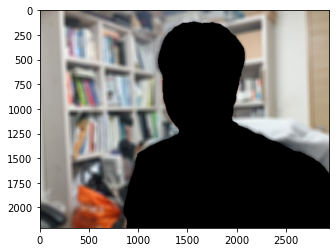

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 배경과 사람 합치기

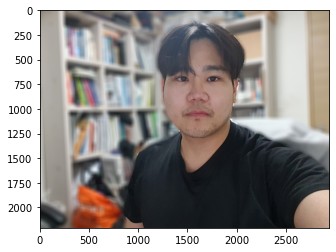

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

사진에서 딱히 문제점이라고 할 것을 제대로 찾지 못했다.   
다른 이미지로 실습할때 문제를 발견해서 확인한다

`InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory`   
에러 발생 GPU 메모리가 모자라서 발생하는 오류   
에러를 해결했다기 보다는 다른 노드를 들어갔다 다시 들어오는 환경 변경을 통해 문제를 해결했다.


# 여러명 사진 문제

혼자 있는 사진이 아닌 여러명이 있는 사진을 실습해보려 했지만 실패했다.

`segvalues, output = model.segmentAsPascalvoc(img_path)` 코드를 실행하면 ` OOM when allocating tensor with shape[144,8,8,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc` 과 같은 에러가 발생했고, 정확한 문제를 찾아내지는 못했지만 찾아보니 이미지 크기가 너무 크기 때문에 발생하는 문제라고 해 이미지 사이즈를 줄여보았다 (800, 1067, 3)로 하지만 여전히 똑같은 에러가 발생했다.   
이유를 모르겠다

그 이후에도 여러번 다른 사진을 시도해 보았지만 비슷하거나 다른 GPU관련 에러가 계속 발생해서 제대로 해보지 못하게 되었다   

**왜 그런지 모르겠지만 가장 큰 문제가 이번 노드를 진행하면서 GPU관련 에러가 계속 발생하였다**   

더더욱이 빨리 로컬환경에 tensorflow를 깔아야겠다는 생각 밖에 안든다  
코랩을 사용하려고 했지만 실습 당시 코랩이 이상하게 계속 연결에러가 발생해서 코랩도 사용하지 못했다.   

이래저래 계속 스트레스.....   